In [1]:
! pip3 install playsound
! pip3 install librosa

In [2]:
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq
from scipy.io.wavfile import write
from playsound import playsound
import librosa.display
import librosa    


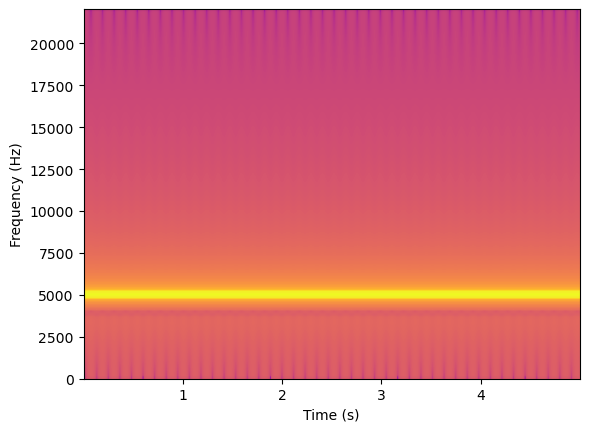

In [6]:
#Sine Tone Generation 

Fs = 44100  
duration = 5  

def generate_sine_wave(freq, Fs, duration):
    x = np.linspace(0, duration, Fs * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

_, tone0 = generate_sine_wave(5000, Fs, duration)

plt.specgram(tone0, Fs=Fs,cmap="plasma")
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


write("teamBurdulis-sinetone.wav", Fs, tone0) 

playsound("teamBurdulis-sinetone.wav")


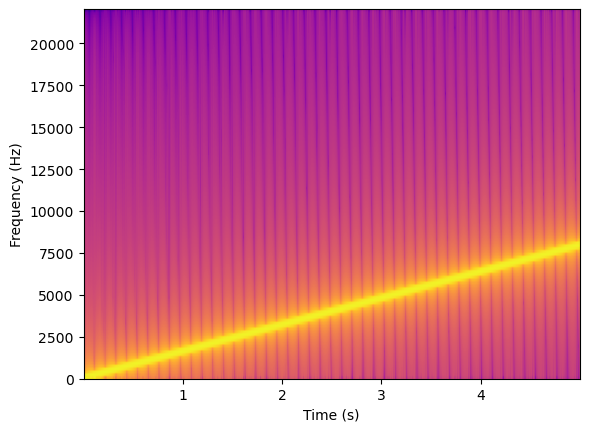

In [5]:
#Chirp Signal Generation 

Fs = 44100  
duration = 5 

x = np.linspace(0, duration, Fs * duration, endpoint=False)

f0 = 0
f1 = 8000

c = (f1 - f0) / duration

chirp_tone = np.sin(2 * np.pi * (c/2 * x**2 + f0 * x ))
 

write("teamBurdulis-chirp.wav", Fs, chirp_tone) 

playsound("teamBurdulis-chirp.wav")

plt.specgram(chirp_tone, Fs=Fs,cmap="plasma")
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()



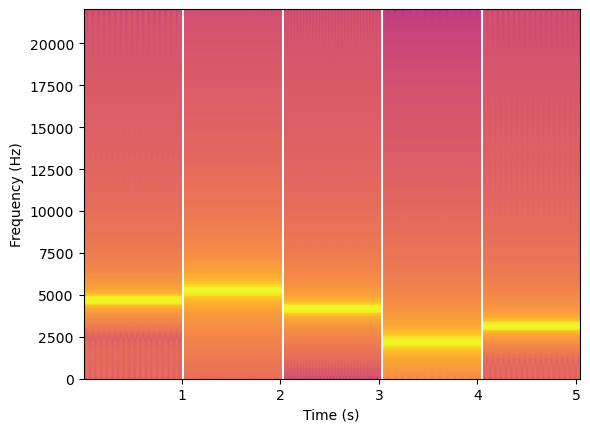

In [30]:
#Fun with Sine Tone 

Fs = 44100  
duration = 1

def generate_sine_wave(freq, Fs, duration):
    x = np.linspace(0, duration, Fs * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y
 
_, tone1 = generate_sine_wave(4660, Fs, duration)
_, tone2 = generate_sine_wave(5230, Fs, duration)
_, tone3 = generate_sine_wave(4150, Fs, duration)
_, tone4 = generate_sine_wave(2150, Fs, duration)
_, tone5 = generate_sine_wave(3110, Fs, duration)


pause_tone = 0.01  
pause_tone = np.zeros(int(Fs * pause_tone))

cetk_tone = np.concatenate((tone1, pause_tone, tone2, pause_tone, tone3, pause_tone, tone4, pause_tone, tone5))


write("teamBurdulis-cetk.wav", Fs, cetk_tone)
playsound("teamBurdulis-cetk.wav")

plt.specgram(cetk_tone,Fs=Fs, cmap="plasma")
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

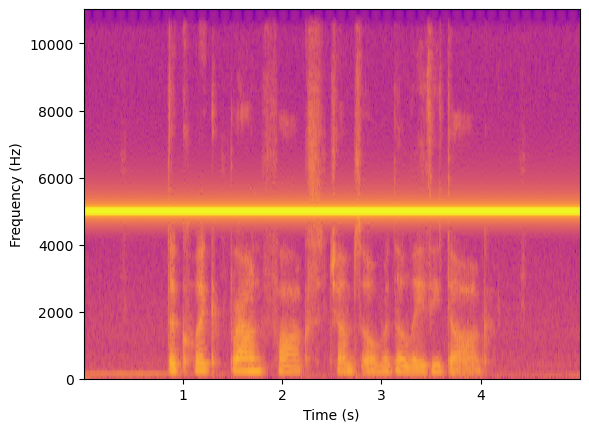

In [33]:
#Combining Sound Files 

Fs = 44100 

speech, Fs = librosa.load('audio1.wav')


sinetone, Fs = librosa.load('teamBurdulis-sinetone.wav')


speech_chirp = speech + sinetone 

write("teamBurdulis-speechchirp.wav", Fs, speech_chirp) 

playsound("teamBurdulis-speechchirp.wav")

plt.specgram(speech_chirp, Fs=Fs,cmap="plasma")
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()



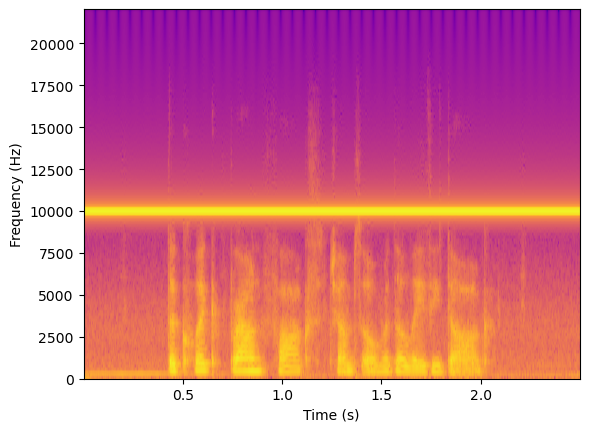

In [50]:
#Speech and Audio Filtering

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from pylab import clf

import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.signal import butter, lfilter, freqz
from scipy.signal import butter,filtfilt

speech_chirp, fs = librosa.load("teamBurdulis-speechchirp.wav")

order = 3
fc = 4000  

sos = signal.iirfilter(order,fc/fs,btype ='low',analog=False, ftype ='butter',output='sos')
filtered_audio = signal.sosfilt(sos, speech_chirp)

write("teamBurdulis-filteredspeechsine.wav", fs, filtered_audio)

playsound("teamBurdulis-filteredspeechsine.wav")

plt.specgram(filtered_audio, Fs=Fs,cmap="plasma")
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

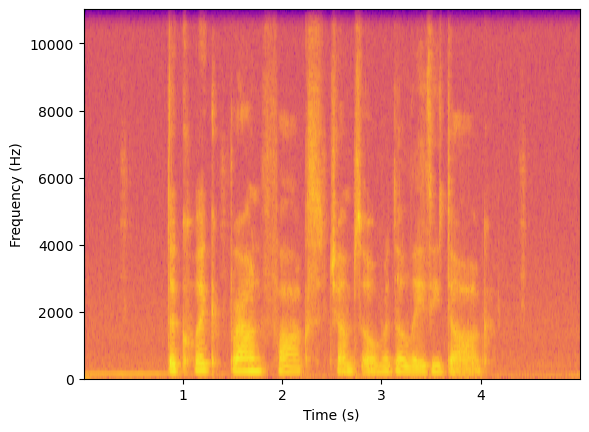

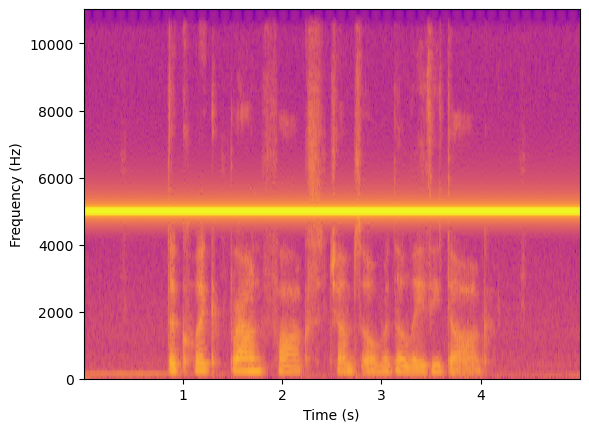

In [13]:
#Stereo Fun

Fs = 44100

L, Fs = librosa.load('audio1.wav', mono=False)
R, Fs = librosa.load("teamBurdulis-speechchirp.wav", mono=False)

output_audio = [L,R];
output_audio = np.array((L,R))
output_audio_row = output_audio.T

write("teamBurdulis-stereospeechsine.wav", Fs, output_audio_row)

playsound("teamBurdulis-stereospeechsine.wav")

plt.specgram(L, Fs=Fs,cmap="plasma")
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

plt.specgram(R, Fs=Fs,cmap="plasma")
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()